Notebook For Model Training


In [8]:
#Importing the Necessary Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


In [2]:
df=pd.read_csv('/workspaces/Codes-Please-/House_Price_Prediction_ML_Project_V2/dataset/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
#replacing yes's and no's with 1s and 0s for numeric model training
binary_cols = ['mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_cols] = df[binary_cols].replace({'yes': 1, 'no': 0})


/tmp/ipykernel_4619/70161697.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'yes': 1, 'no': 0})


In [4]:
df['furnishingstatus_encoded'] = df['furnishingstatus'].map({
    'unfurnished': 0,
    'semi-furnished': 1,
    'furnished': 2
})


In [5]:
df.drop('furnishingstatus',axis=1,inplace=True)

In [6]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_encoded
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


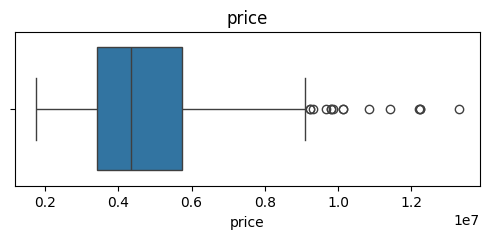

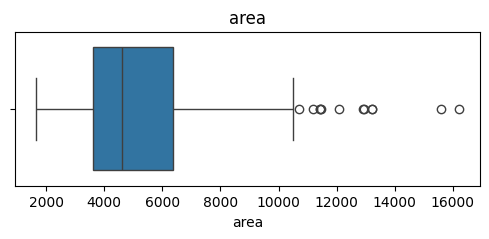

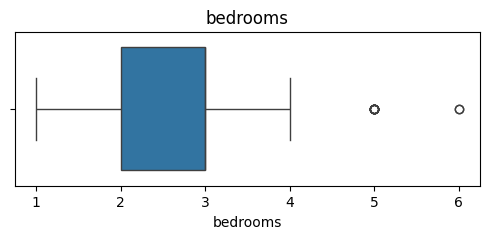

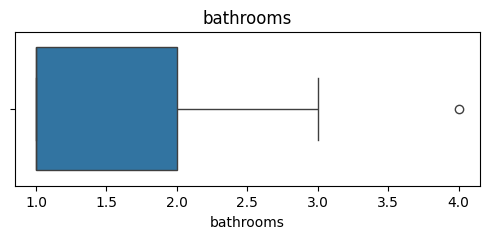

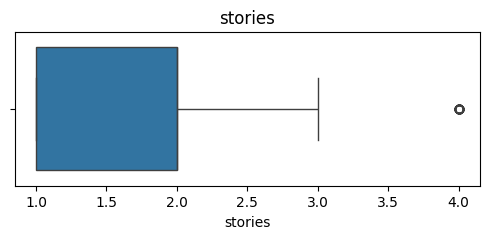

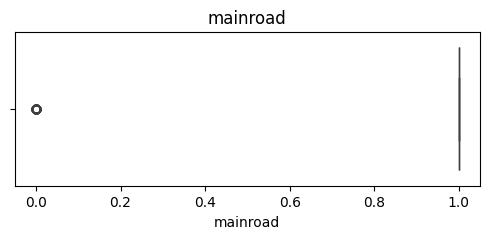

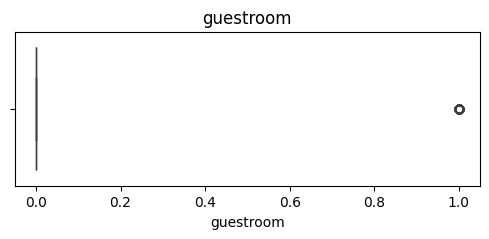

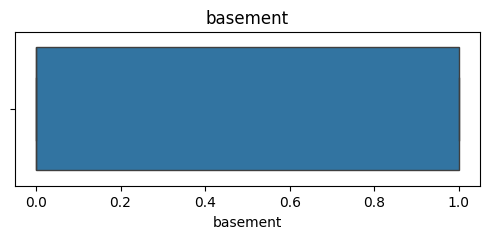

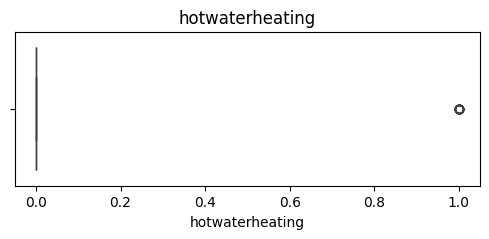

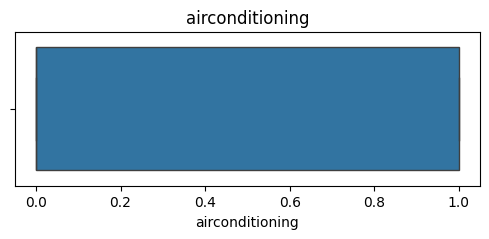

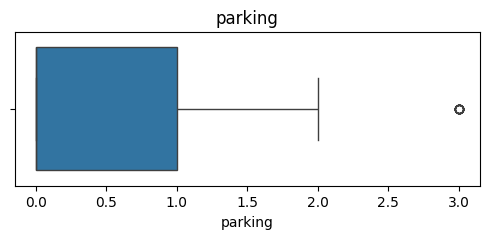

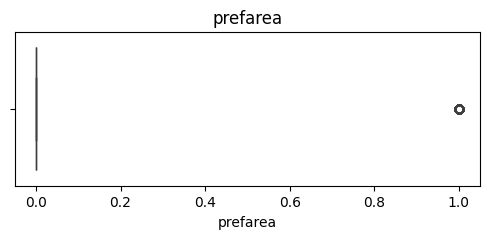

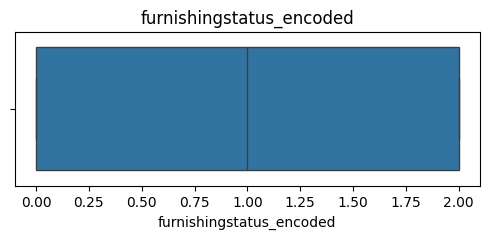

In [13]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

In [14]:
df['area'] = np.log1p(df['area'])
df['price'] = np.log1p(df['price'])  # target variable


In [15]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_encoded
0,16.403275,8.912069,4,2,3,1,0,0,0,1,2,1,2
1,16.321037,9.100637,4,4,4,1,0,0,0,1,3,0,2
2,16.321037,9.206433,3,2,2,1,0,1,0,0,2,1,1
3,16.318175,8.922792,4,2,2,1,0,1,0,1,3,1,2
4,16.250001,8.912069,4,1,2,1,1,1,0,1,2,0,2


<Axes: ylabel='price'>

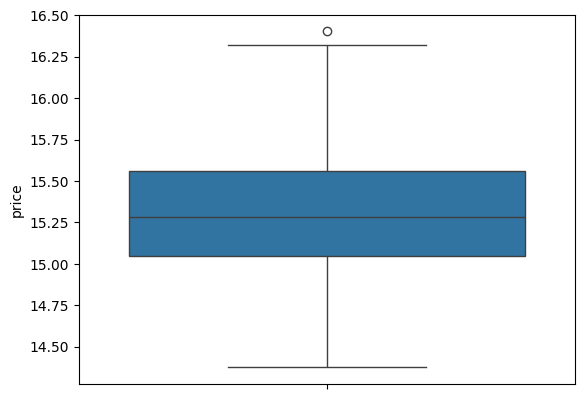

In [16]:
sns.boxplot(df['price'])

In [23]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_encoded
0,16.403275,8.912069,4,2,3,1,0,0,0,1,2,1,2
1,16.321037,9.100637,4,4,4,1,0,0,0,1,3,0,2
2,16.321037,9.206433,3,2,2,1,0,1,0,0,2,1,1
3,16.318175,8.922792,4,2,2,1,0,1,0,1,3,1,2
4,16.250001,8.912069,4,1,2,1,1,1,0,1,2,0,2


In [40]:
X=df.drop('price',axis=1)
y=df['price']

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [42]:
#Standardising the values for better model training to avoid bias 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square


In [44]:
## Beginning Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "ElasticNet": ElasticNet(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBOOST": XGBRegressor(),

}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred_log = model.predict(X_train)
    y_test_pred_log = model.predict(X_test)
    y_train_pred = np.exp(y_train_pred_log)
    y_test_pred = np.exp(y_test_pred_log)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(np.exp(y_train), y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(np.exp(y_test), y_test_pred)


    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 955384.0585
- Mean Absolute Error: 678107.9218
- R2 Score: 0.7040
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1328012.0214
- Mean Absolute Error: 989338.9218
- R2 Score: 0.6511


Lasso
Model performance for Training set
- Root Mean Squared Error: 1779596.5402
- Mean Absolute Error: 1312918.3077
- R2 Score: -0.0271
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2324389.0080
- Mean Absolute Error: 1753985.4992
- R2 Score: -0.0689


Ridge
Model performance for Training set
- Root Mean Squared Error: 955422.0119
- Mean Absolute Error: 677974.2883
- R2 Score: 0.7040
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1328189.0812
- Mean Absolute Error: 989099.4385
- R2 Score: 0.6510


ElasticNet
Model performance for Training set
- Root Mean Squared Error: 1779596.5402
- Mean Ab

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.6}
=== Train Performance ===
MAE: 551503.5166284405
R²: 0.7917311505332197

=== Test Performance ===
MAE: 1015010.4380733944
R²: 0.5948647651007176


<Figure size 1000x600 with 0 Axes>

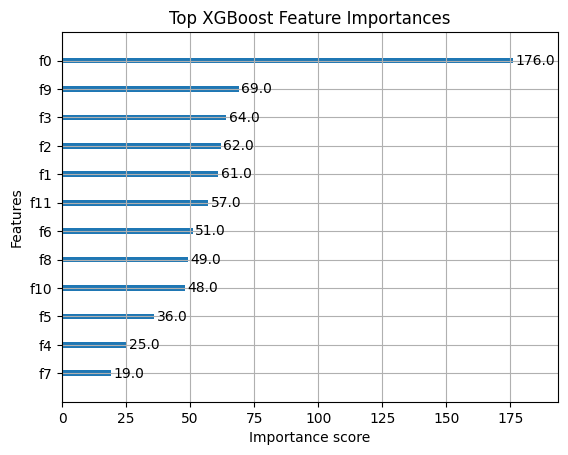

In [45]:
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5]
}

# Initialize base model
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Randomized Search CV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=50,
    scoring='neg_mean_absolute_error',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train)

# Best model
best_xgb = random_search.best_estimator_

print("Best Parameters:", random_search.best_params_)

# Predictions
y_pred_train = best_xgb.predict(X_train)
y_pred_test = best_xgb.predict(X_test)

# If your target variable was log-transformed, do inverse transform
y_pred_train = np.expm1(y_pred_train)
y_pred_test = np.expm1(y_pred_test)
y_train_actual = np.expm1(y_train)
y_test_actual = np.expm1(y_test)

# Evaluation
print("=== Train Performance ===")
print("MAE:", mean_absolute_error(y_train_actual, y_pred_train))
print("R²:", r2_score(y_train_actual, y_pred_train))

print("\n=== Test Performance ===")
print("MAE:", mean_absolute_error(y_test_actual, y_pred_test))
print("R²:", r2_score(y_test_actual, y_pred_test))

# Feature Importance Plot
plt.figure(figsize=(10, 6))
plot_importance(best_xgb, importance_type='weight', max_num_features=15)
plt.title("Top XGBoost Feature Importances")
plt.show()


In [51]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define parameter grid for tuning
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Setup Ridge with GridSearchCV
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_ridge = grid_search.best_estimator_

# Predictions
y_train_pred_log = best_ridge.predict(X_train)
y_test_pred_log = best_ridge.predict(X_test)
y_train_pred = np.exp(y_train_pred_log)
y_test_pred = np.exp(y_test_pred_log)

# Evaluation
def evaluate_model(y_true, y_pred, dataset=""):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{dataset} Set Performance")
    print(f"- Mean Absolute Error (MAE): {mae:.4f}")
    print(f"- Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"- R² Score: {r2:.4f}")
    print("-" * 40)

# Results
print("Best alpha:", grid_search.best_params_['alpha'])
print("="*40)
evaluate_model(np.exp(y_train), y_train_pred, "Training")
evaluate_model(np.exp(y_test), y_test_pred, "Test")


Best alpha: 10
Training Set Performance
- Mean Absolute Error (MAE): 677028.6891
- Root Mean Squared Error (RMSE): 956012.9606
- R² Score: 0.7036
----------------------------------------
Test Set Performance
- Mean Absolute Error (MAE): 987143.7384
- Root Mean Squared Error (RMSE): 1330125.1305
- R² Score: 0.6500
----------------------------------------


In [54]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create a pipeline with PolynomialFeatures and Ridge Regression
pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('ridge', Ridge())
])

# Grid for both polynomial degree and Ridge alpha
param_grid = {
    'poly__degree': [2],  # Try higher if needed, but start with 2
    'ridge__alpha': [0.01, 0.1, 1, 10, 100]
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)  # y_train is already log-transformed

# Best model
best_model = grid_search.best_estimator_

# Predict on training and test data (in log scale)
y_train_pred_log = best_model.predict(X_train)
y_test_pred_log = best_model.predict(X_test)

# Convert back to original scale
y_train_pred = np.exp(y_train_pred_log)
y_test_pred = np.exp(y_test_pred_log)

# Evaluation function
def evaluate_model(y_true, y_pred, dataset=""):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{dataset} Set Performance")
    print(f"- Mean Absolute Error (MAE): {mae:.2f}")
    print(f"- Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"- R² Score: {r2:.4f}")
    print("-" * 40)

# Print results
print("Best parameters:", grid_search.best_params_)
print("="*40)
evaluate_model(np.exp(y_train), y_train_pred, "Training")
evaluate_model(np.exp(y_test), y_test_pred, "Test")


Best parameters: {'poly__degree': 2, 'ridge__alpha': 100}
Training Set Performance
- Mean Absolute Error (MAE): 595078.80
- Root Mean Squared Error (RMSE): 861969.69
- R² Score: 0.7590
----------------------------------------
Test Set Performance
- Mean Absolute Error (MAE): 1007363.42
- Root Mean Squared Error (RMSE): 1415598.60
- R² Score: 0.6035
----------------------------------------
